# Data collection by using Twitter API endpoint

This code pulls 10,000 tweets from Twitter database, and performs sentiment analysis. The code can be used only by users with ***elevated*** access or higher.

In [1]:
import tweepy, requests
import pandas as pd
import tweepy, requests, time
import re
from datetime import datetime
import unicodedata

In [2]:
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import traceback
import logging
from IPython.display import display, clear_output
from PIL import Image

## Custom functions

In [4]:
# Function that cleans text 
def cleantxt(text):
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'@[A-Za-z0-9,_,:,;]+', '', text) # Removed @mentions
    text = re.sub(r'#', '', text) # Removing the '#' symbol
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    return text

# Function that gets subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function that gets polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function that analyzies polarity, and clarifies either the tweet is negative, positive, or neutral
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

## Import keys of access Twitter API

In [5]:
log = pd.read_csv('Login.csv')
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
bearer_token = log['Key'][4]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

# Creat authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token=bearer_token,
                       wait_on_rate_limit = True)

## Main code

### Tweets extraction

In [23]:
query = "ukraine lang:en -is:retweet"
tweets_list = []

for i in range(100):
    tweets = api.search_tweets(q = query,
                               tweet_mode = "extended", 
                               count = 100, 
                               result_type = "mixed")
    for tweet in tweets:
        tweets_list.append(tweet)
    
print("Total Tweets fetched:", len(tweets_list))

Total Tweets fetched: 10000


Because the command "api.search_tweets" has limitation to maximum of 100 tweets. With "for loop" I was able to extract 10,000 tweets. However everytime I tried to inrease the number of iterations (so I could have more tweets), it would lead to an error "Rate limit reached. Sleeping for:..."

In [8]:
# Transform tweet_list into a dataframe
df_tweets = pd.DataFrame([tweet.full_text for tweet in tweets_list], columns = ['Tweets'])

df_tweets.head(10)

,Tweets
0,Ukraine is such a violent and deadly warzone t...
1,"Today, the United States has authorized our bi..."
2,⚡️ Finnish PM: 'It’s unfair that Russians can ...
3,RT @RedMentality: Israeli settlers just bombed...
4,RT @thehill: JUST IN: Pentagon confirms anti-r...
5,RT @mmpadellan: @ReallyAmerican1 It's amazing ...
6,RT @StollmeyerEU: For those who read Ukrainian...
7,@AVindman I think Ukraine has learned the art ...
8,@cnnbrk Ukraine is takin it to the Russians! T...
9,RT @ILRUSSO1: 🆕🔥🔥🔥The growth of the surplus of...


In [9]:
# Clean tweets
df_tweets['Tweets'] = df_tweets['Tweets'].apply(cleantxt)

df_tweets.head(10)

,Tweets
0,Ukraine is such a violent and deadly warzone t...
1,"Today, the United States has authorized our bi..."
2,⚡️ Finnish PM: 'It’s unfair that Russians can ...
3,Israeli settlers just bombed and killed 31 Pa...
4,JUST IN: Pentagon confirms anti-radiation mis...
5,It's amazing the things you can accomplish w...
6,For those who read Ukrainian:\n\n interviewed...
7,I think Ukraine has learned the art of extort...
8,Ukraine is takin it to the Russians! The Ukra...
9,🆕🔥🔥🔥The growth of the surplus of Russia's for...


Using the function 'cleantxt' allows me to have texts cleared of RTs, @, hastags, or hyperlinks. Which would give better results on sentiments analysis process.

### Get subjectivity and polarity

In [10]:
df_tweets['Subjectivity'] = df_tweets['Tweets'].apply(get_subjectivity)
df_tweets['Polarity'] = df_tweets['Tweets'].apply(get_polarity)

df_tweets

,Tweets,Subjectivity,Polarity
0,Ukraine is such a violent and deadly warzone t...,0.691667,-0.375000
1,"Today, the United States has authorized our bi...",0.800000,0.000000
2,⚡️ Finnish PM: 'It’s unfair that Russians can ...,0.700000,-0.458333
3,Israeli settlers just bombed and killed 31 Pa...,0.000000,-0.200000
4,JUST IN: Pentagon confirms anti-radiation mis...,0.000000,0.000000
...,...,...,...
9995,"So, now Democrats single-handedly ruined the ...",0.365079,0.178571
9996,"Co-founder of 's Swedish chapter, Pär Wästbe...",0.000000,0.000000
9997,Day 167 of my 3 day war. Ukraine is attacking...,0.000000,0.000000
9998,Ukraine appears to have hit a Russian airbase...,0.000000,0.000000


### Word Cloud

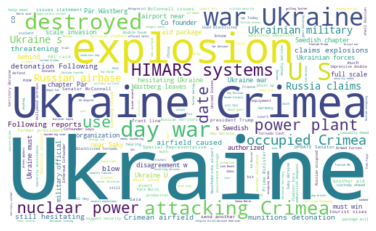

In [11]:
allwords = ' '.join(tweets for tweets in df_tweets['Tweets'])
wc = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119, 
               background_color = 'white').generate(allwords)

plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

In [12]:
df_tweets['Analysis'] = df_tweets['Polarity'].apply(get_analysis)

df_tweets

,Tweets,Subjectivity,Polarity,Analysis
0,Ukraine is such a violent and deadly warzone t...,0.691667,-0.375000,Negative
1,"Today, the United States has authorized our bi...",0.800000,0.000000,Neutral
2,⚡️ Finnish PM: 'It’s unfair that Russians can ...,0.700000,-0.458333,Negative
3,Israeli settlers just bombed and killed 31 Pa...,0.000000,-0.200000,Negative
4,JUST IN: Pentagon confirms anti-radiation mis...,0.000000,0.000000,Neutral
...,...,...,...,...
9995,"So, now Democrats single-handedly ruined the ...",0.365079,0.178571,Positive
9996,"Co-founder of 's Swedish chapter, Pär Wästbe...",0.000000,0.000000,Neutral
9997,Day 167 of my 3 day war. Ukraine is attacking...,0.000000,0.000000,Neutral
9998,Ukraine appears to have hit a Russian airbase...,0.000000,0.000000,Neutral


### Scatter Plot

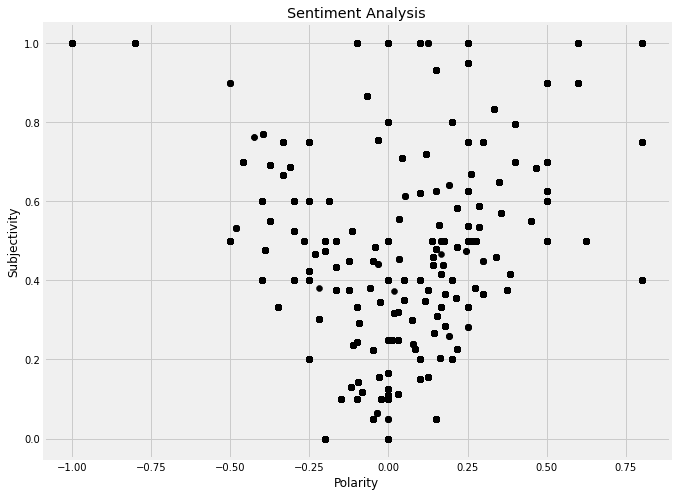

Neutral     4356
Positive    3472
Negative    2172
Name: Analysis, dtype: int64

In [18]:
plt.figure(figsize = (10,8))
for i in range(0, df_tweets.shape[0]):
    plt.scatter(df_tweets['Polarity'][i], df_tweets['Subjectivity'][i], color = 'Black')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

print('')
display(df_tweets['Analysis'].value_counts())

### Bar Plot

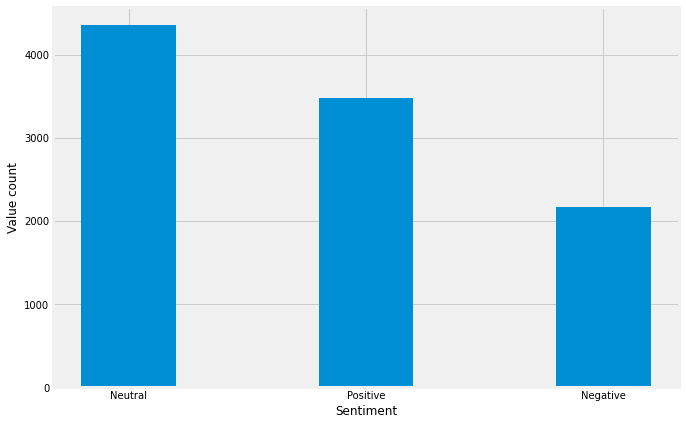

In [16]:
# Barplot
df = df_tweets['Analysis'].value_counts().rename_axis('Sentiment').reset_index(name = 'Counts')

y = df['Counts']
x = df['Sentiment']

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(x, y, width = 0.4)
plt.xlabel('Sentiment')
plt.ylabel('Value count')
plt.show()

As we can see most tweets are neutral towards the main topic (#ukraine), or have zero polarity. 

In [24]:
def twitter_extraction(query, start_time, end_time):
    tweet_info_ls = []
    counter = 0
    saved = False
    for tweet in tweepy.Paginator(client.search_recent_tweets, 
                             query=query,
                             start_time=start_time,
                             end_time=end_time,
                             tweet_fields = ["id","created_at", "text", "geo"],
                             user_fields = ["username", "location", "verified", "description"],
                             max_results = 500,
                             expansions='author_id,geo.place_id'
                              
                             ).flatten(limit= 500000):
        try:
        #print(tweet.data)
            tweet_info = {
                    'tweet_id' : tweet.id,
                    'tweet_created_at': tweet.created_at,
                    'tweet_text':  unicodedata.normalize('NFKD', tweet.text).encode('ascii','ignore'),
                    'author_id': tweet.author_id
                }
            now = datetime.now() # current date and time
            tweet_info_ls.append(tweet_info)
            saved = False
            counter += 1
            if counter%10000 == 0: # every 10,000 rows save to CSV to preserve results
                # create dataframe from the extracted records
                tweets_df = pd.DataFrame(tweet_info_ls)

                now = datetime.now()
                date_time = now.strftime('%m/%d/%Y %H:%M:%S')
                if counter%30000 == 0:
                    filename = re.sub(r'\W+', '', query) + "_30K.csv"
                    tweets_df.to_csv('./twitter_output/' + filename, index = False)
                    saved = True
                    print(date_time + '   Iteration '+ str(counter) +': ' + filename)
                elif counter%20000 == 0:
                    filename = re.sub(r'\W+', '', query) + "_20K.csv"
                    tweets_df.to_csv('./twitter_output/' + filename, index = False)
                    saved = True
                    print(date_time + '   Iteration '+ str(counter) +': ' + filename)
                elif counter%10000 == 0:
                    filename = re.sub(r'\W+', '', query) + "_10K.csv"
                    tweets_df.to_csv('./twitter_output/' + filename, index = False)
                    saved = True
                    print(date_time + '   Iteration '+ str(counter) +': ' + filename)

            clear_output(wait=True)
            display('Iteration '+str(counter))

            end = datetime.now() # current date and time
            delta = end - now
            if delta.total_seconds() <0.5:
                time.sleep(0.005)
        except Exception as e:
            print("type error: " + str(e))
            logging.error(traceback.format_exc())
            
            #SAVE retrieved tweets to CSV to preserve data
            # create dataframe from the extracted records
            tweets_df = pd.DataFrame(tweet_info_ls)
            now = datetime.now()
            date_time = now.strftime('%m/%d/%Y %H:%M:%S')
            filename = re.sub(r'\W+', '', query + date_time) + "_save_on_except.csv"
            tweets_df.to_csv('./twitter_output/' + filename, index = False)
            
            print ('Sleeping for 15 minutes ...')
            time.sleep(15 * 60)
#-------------------------
    saved = False # ensure that the final file gets saved 
    while not saved:
        try:
            tweets_df = pd.DataFrame(tweet_info_ls)
            #now = datetime.now() # current date and time
            #date_time = now.strftime('%m %d %Y %H %M %S')
            #print("date/time: ",date_time)
            
            start = re.sub(r'\W+', '', start_time)[0:8]
            end = re.sub(r'\W+', '', end_time)[0:8]
            
            filename = re.sub(r'\W+', '', query) + "_" + start + "_" + end + ".csv"
            tweets_df.to_csv('./twitter_output/' + filename, index = False)
            saved = True
            print('Last: ' + filename)
        except Exception as e:
            print("type error: " + str(e))
            logging.error(traceback.format_exc())
            
            #SAVE retrieved tweets to CSV to preserve data
            # create dataframe from the extracted records
            tweets_df = pd.DataFrame(tweet_info_ls)
            now = datetime.now()
            date_time = now.strftime('%m/%d/%Y %H:%M:%S')
            filename = re.sub(r'\W+', '', query + date_time) + "_save_on_except.csv"
            tweets_df.to_csv('./twitter_output/' + filename, index = False)

            print ('Sleeping for 15 minutes ...')
            time.sleep(15 * 60)
   